In [1]:
# Installing package

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install standard-scaler

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [10]:
# Importing Necessary Modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt

import imblearn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [11]:
# Reading the data 
data = pd.read_csv(r'D:/277/Sowbhagya/DS/CSVs/train.csv')

In [12]:
# Checking datas
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [13]:
# Finding the total shape of the data
data.shape

(45211, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [15]:
# Checking the columns present in the data
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Unique values of each column

In [16]:
for i in data.columns:
    print(i)
    print(data[i].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education_qual
['tertiary' 'secondary' 'unknown' 'primary']
call_type
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur
[ 261  151   76 ... 1298 1246 1556]
num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [17]:
# Identifing integer columns
number = data.select_dtypes(include=[np.number])
number.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [18]:
# Identifing category columns
string = data.select_dtypes(include=['object']).columns
string

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

In [19]:
# Checking for correct datatypes
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [20]:
# checking the unknown priority
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [21]:
# Replacing the unknown values
data.job = data.job.str.replace("unknown","blue-collar")

In [22]:
# Checking the unknown has been replaced or not
data.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [23]:
# Checking for unknown priority
data.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [24]:
# Replacing the unknown values
data.education_qual = data.education_qual.str.replace("unknown","secondary")

In [25]:
# Checking for the unknown value replaced or not
data.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [26]:
# Unknown value is large so it is defined as a category
data.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [27]:
# Unknown value is large so it is defined as a category
data.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

# Converting the target value from 'str' to 'int'

In [28]:
# Count of values in Target variable column
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [29]:
# Find the sum of y variable
d = pd.Series({'no': 39922, 'yes': 5289})
total = d.sum()

print(total)

# Finding the percentage for Target variable (No)
no = ((39922)/(total))*100
print(no)

# Finding the percentage for Target variable (YES)
yes = ((5289)/(total))*100
print(yes)

45211
88.30151954170445
11.698480458295547


In [30]:
# Converting the values of 'y' to numerical values
data['y'] = data['y'].map({'yes':1,'no':0})

In [31]:
# Checking the target values are converted into numerical values or not
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [32]:
# Checking whether the target column has converted into integer(int64)
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# Cleaning the data

In [33]:
# Checking for missing value
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [34]:
# If there is any null values this will drop them
data = data.dropna()

In [35]:
# Duplicates in dataframe
duplicates = data[data.duplicated()]
duplicates

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,0
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,0
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,0
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,0
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,0
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,0


In [36]:
#Checking for duplicates in data

D=data.duplicated().sum()

print('Duplicates in data:', D)

Duplicates in data: 6


In [37]:
# Removing the duplicates
data = data.drop_duplicates()
print('Duplicates in data:',data.duplicated().sum())

Duplicates in data: 0


In [38]:
data.shape

(45205, 11)

In [39]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [40]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# Detecting outliers

In [41]:
# Detcting outliers for 'AGE' column
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.age.quantile(0.75) + (1.5*iqr)
low_threshold = data.age.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.age =data.age.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Converting the 'age' column to int64
data['age'] = data['age'].astype('int64')

# Counting the number of outliers above and below the thresholds
below = data[data['age'] < low_threshold]['age'].count()
above = data[data['age'] > up_threshold]['age'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 15.0
upper_threshold is 70.5
lower_threshold is 10.5
above outlier count is 0
below outlier count is 0


In [42]:
# Detcting outliers for 'DUR' column
iqr = data.dur.quantile(0.75) - data.dur.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.dur.quantile(0.75) + (1.5*iqr)
low_threshold = data.dur.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.dur =data.dur.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Counting the number of outliers above and below the thresholds
below = data[data['dur'] < low_threshold]['dur'].count()
above = data[data['dur'] > up_threshold]['dur'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 216.0
upper_threshold is 643.0
lower_threshold is -221.0
above outlier count is 0
below outlier count is 0


In [43]:
# Detcting outliers for 'NUM_CALLS' column
iqr = data.num_calls.quantile(0.75) - data.num_calls.quantile(0.25)
print('Interquantile range is',iqr)
up_threshold = data.num_calls.quantile(0.75) + (1.5*iqr)
low_threshold = data.num_calls.quantile(0.25) - (1.5*iqr)

# Clipping the outliers to upper and lower threshold
data.num_calls =data.num_calls.clip(up_threshold,low_threshold)

print('upper_threshold is',up_threshold)
print('lower_threshold is',low_threshold)

# Counting the number of outliers above and below the thresholds
below = data[data['num_calls'] < low_threshold]['num_calls'].count()
above = data[data['num_calls'] > up_threshold]['num_calls'].count()

print('above outlier count is',above)
print('below outlier count is',below)

Interquantile range is 2.0
upper_threshold is 6.0
lower_threshold is -2.0
above outlier count is 0
below outlier count is 0


In [44]:
data.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [45]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235,0.117000
std,10.380009,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.000000,31.00000,643.00000,6.000000,1.000000


In [46]:
data.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                   int64
dtype: object

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='age', ylabel='Density'>

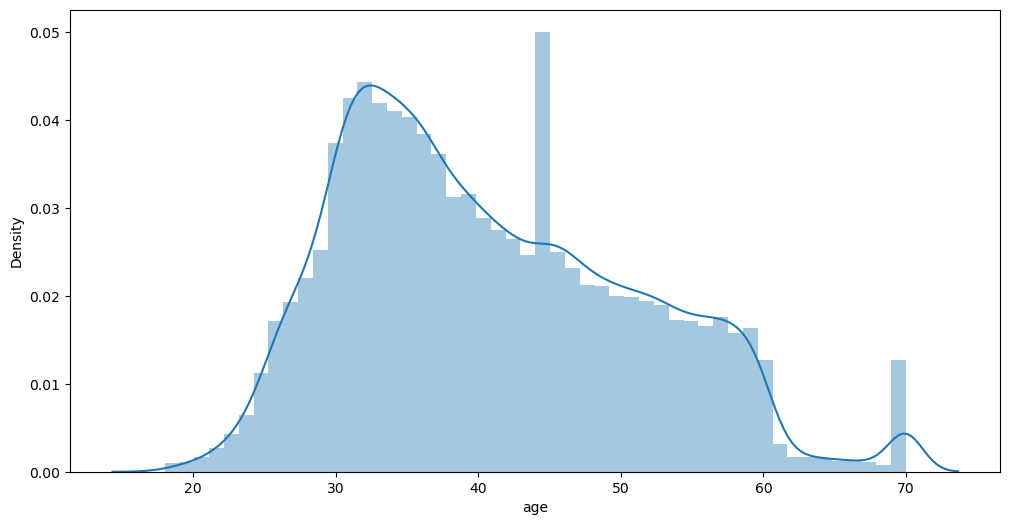

In [47]:
# Creating a plot to check the distribution for AGE
plt.figure(figsize=(12,6))                  #describing the size of the histogram
sns.distplot(data.age)                     #this pulls the data from age column

<AxesSubplot:xlabel='day', ylabel='Density'>

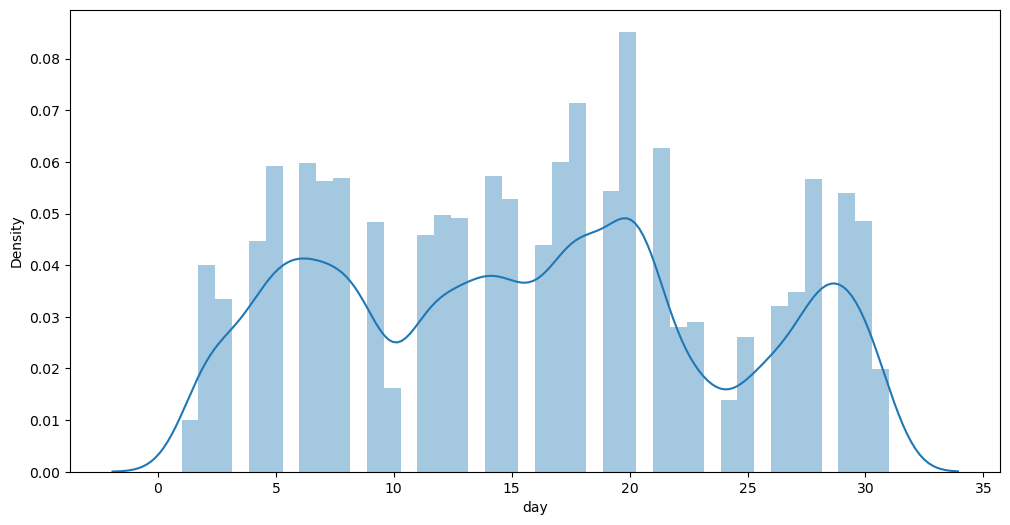

In [48]:
# Creating a plot to check the distribution for DAY
plt.figure(figsize=(12,6))
sns.distplot(data.day)

The age distributed between 18 to 70 and middle age from 30 to 45 are more likely to purchase insurance

The day distributed between 1 to 31 days

<AxesSubplot:xlabel='dur', ylabel='Density'>

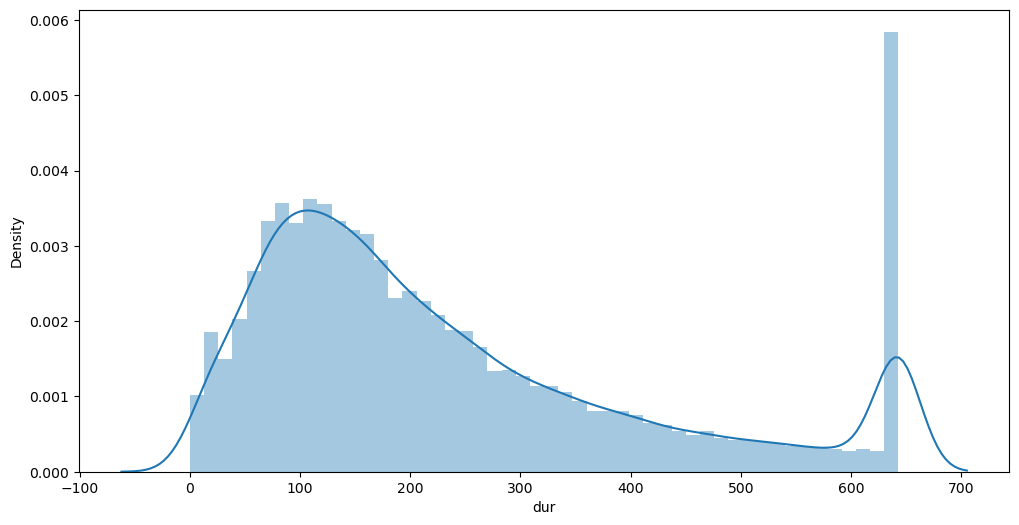

In [49]:
# Creating a plot to check the distribution for DUR and NUM_CALLS
plt.figure(figsize=(12,6))                      #describing the size of the histogram                            
sns.distplot(data.dur)                          #this pulls the data from dur column

<AxesSubplot:xlabel='num_calls', ylabel='Density'>

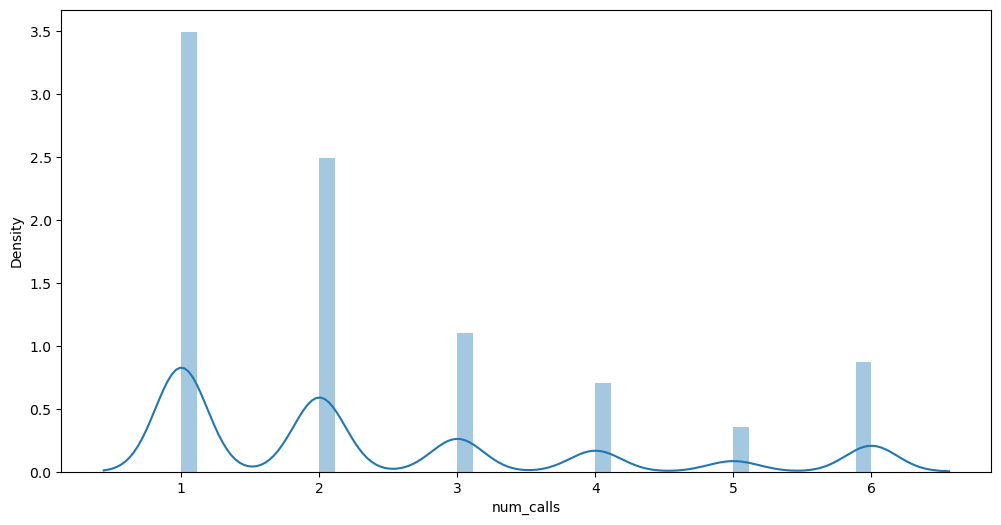

In [50]:
# Creating a plot to check the distribution for NUM_CALLS
plt.figure(figsize=(12,6))
sns.distplot(data.num_calls)

The duration between 0 to 650

the numb calls from 1 to 6

# Feature VS Target

# JOB

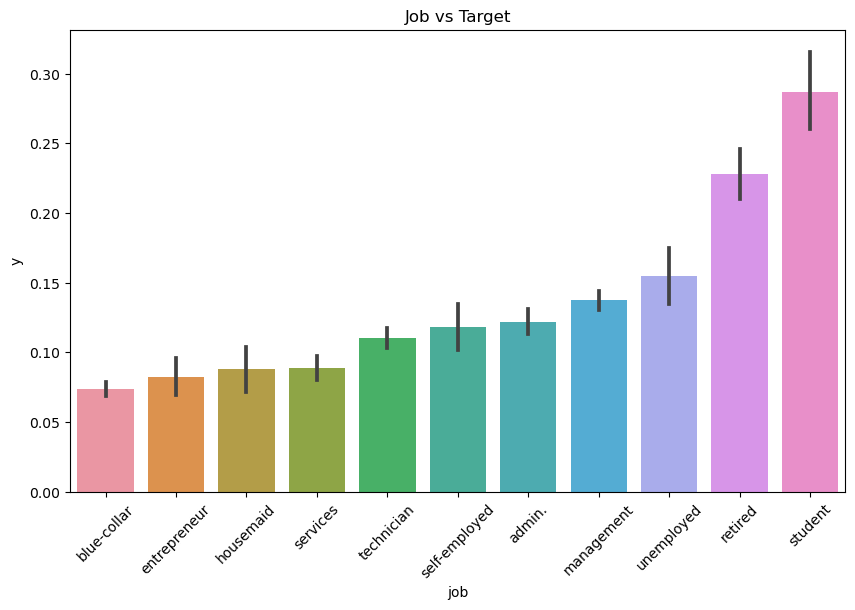

In [51]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=45)
plt.title('Job vs Target')
plt.show()

Students are targeted more compared with other professions, second highest is retired persons we can see a linear increase in job column so we go with label encoding.

{'blue-collar' :0, 'entrepreneur' :1, 'housemaid' :2, 'services' :3, 'technician' :4, 'self-employed' :5, 'admin.' :6, 'management' :7, 'unemployed' :8, 'retired' :9, 'student' :10}

# Marital

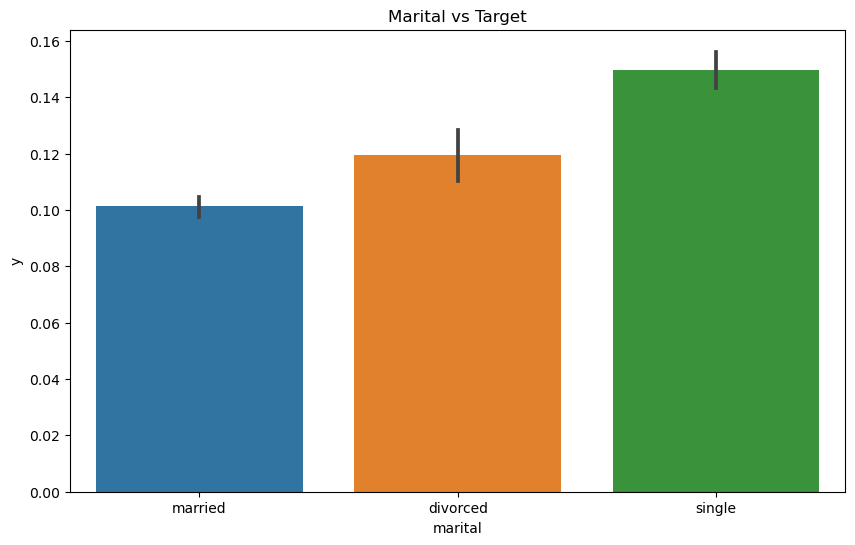

In [52]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=0)
plt.title('Marital vs Target')
plt.show()

Single category has subsribed to insurance other than married and divorced there is a linear increase 

{'married' :0, 'divorced' :1, 'single' :2}

# Education_qual

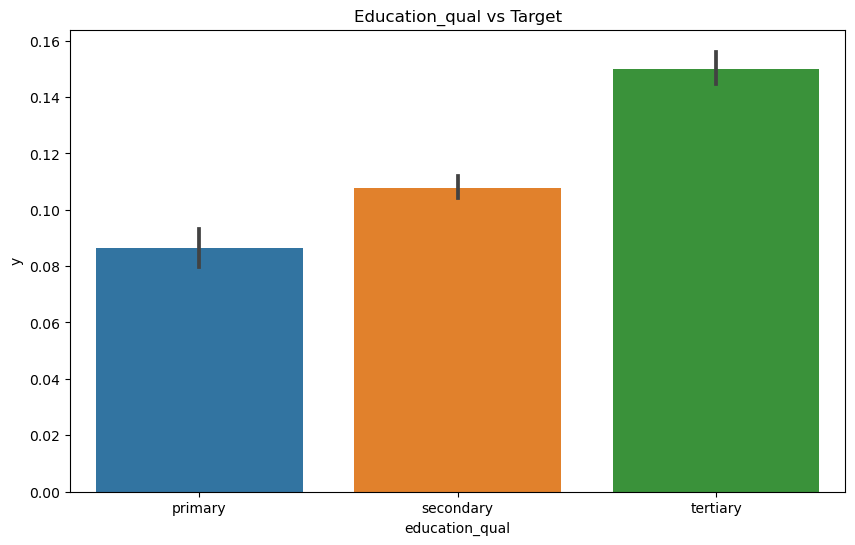

In [53]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=0)
plt.title('Education_qual vs Target')
plt.show()

Tertiary category is intrested more to subscribe to the insurance other than primary and secondary, we can see a linear increase, so we can use label encoding. 

{'primary' :0, 'secondary' :1, 'tertiary' :2}

# Call_Type

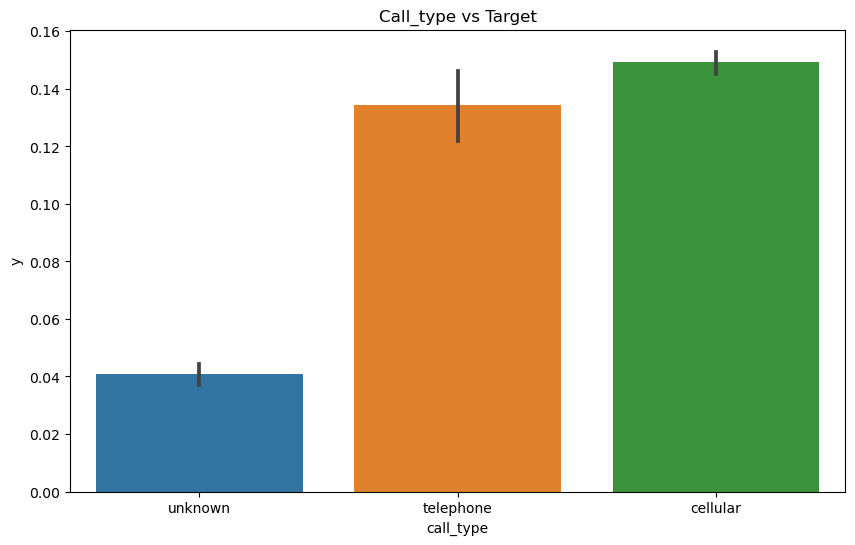

In [54]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=0)
plt.title('Call_type vs Target')
plt.show()

We can see, through cellular the most calls were registered and subscribed to insurance plan , there is no linear increase so we go with one-hot encoding.

{'unknown' :0, 'telephone' :1, 'cellular' :2}

# Month(Mon)

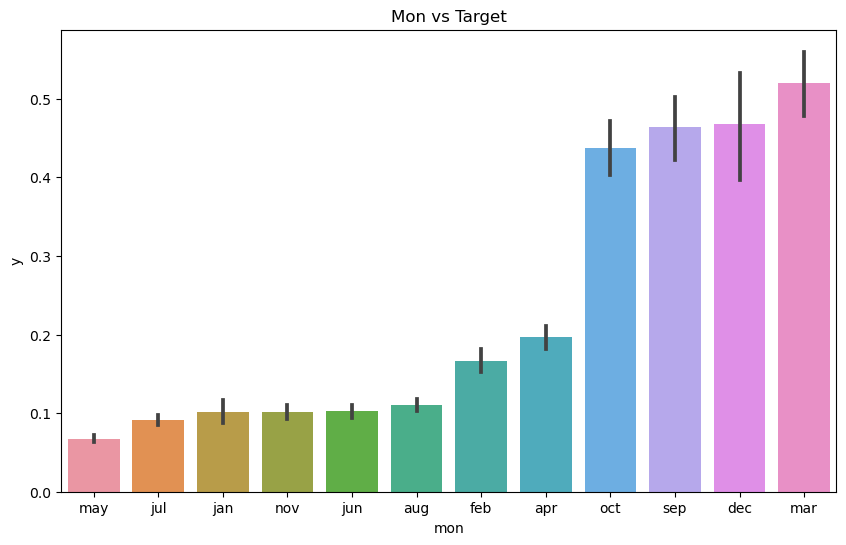

In [55]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=0)
plt.title('Mon vs Target')
plt.show()

We can see that month of march, have more insurance policy subscribed.

{'may' :0, 'jul' :1, 'jan' :2, 'nov' :3, 'jun' :4, 'aug' :5, 'feb' :6, 'apr' :7, 'oct' :8, 'sep' :9, 'dec' :10, 'mar' :11}

# Prev_Outcome

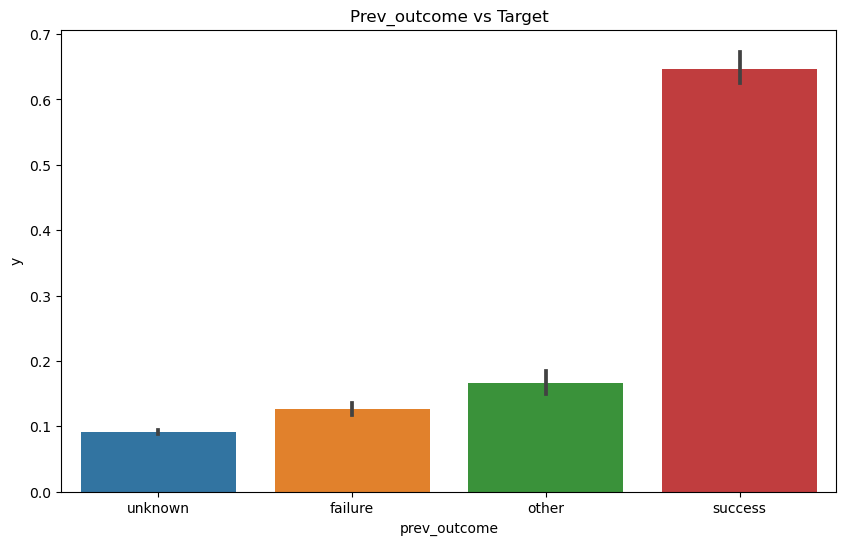

In [56]:
# Plotting the figure using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=0)
plt.title('Prev_outcome vs Target')
plt.show()

# For Numerical data

# AGE

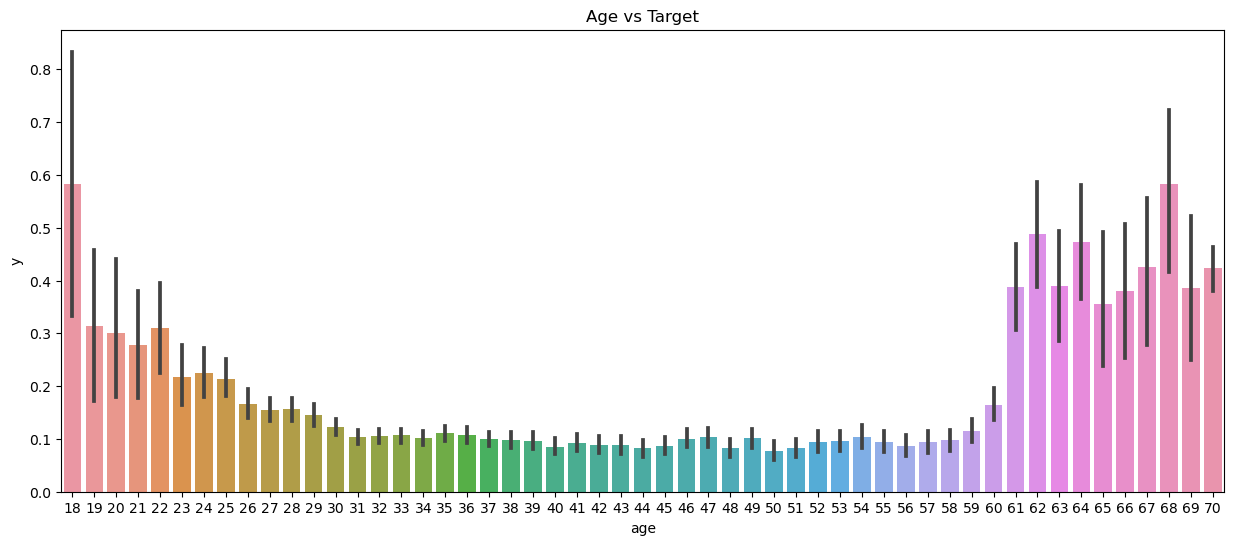

In [57]:
# Plotting the figure using barplot
sorted_age = sorted(data['age'].unique())
plt.figure(figsize=(15,6))
sns.barplot(x='age', y='y', data=data, order=sorted_age)
plt.xticks(rotation=0)
plt.title('Age vs Target')
plt.show()

# DAY

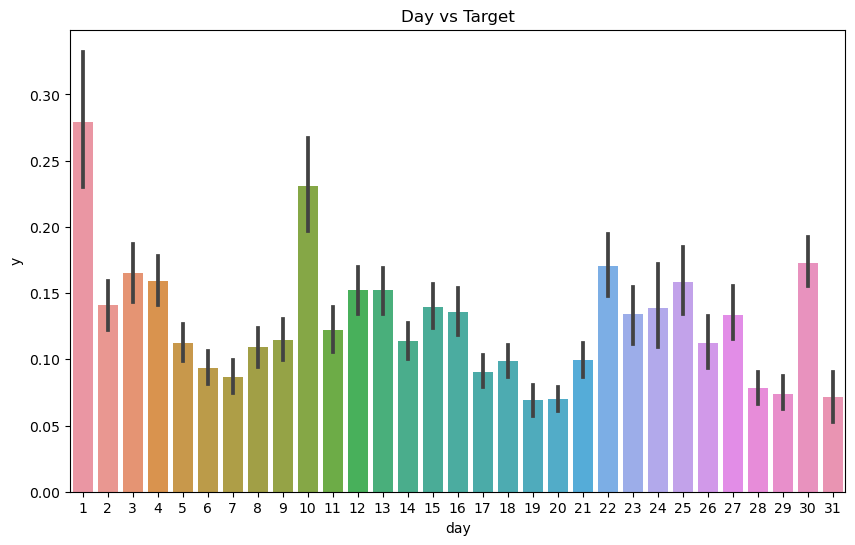

In [58]:
# Plotting the figure using barplot
sorted_days = sorted(data['day'].unique())
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='y', data=data, order=sorted_days)
plt.xticks(rotation=0)
plt.title('Day vs Target')
plt.show()

We can see that the day 1 has the highest conversion rate and day 10 has the second highest conversion rate.

# Num_Calls

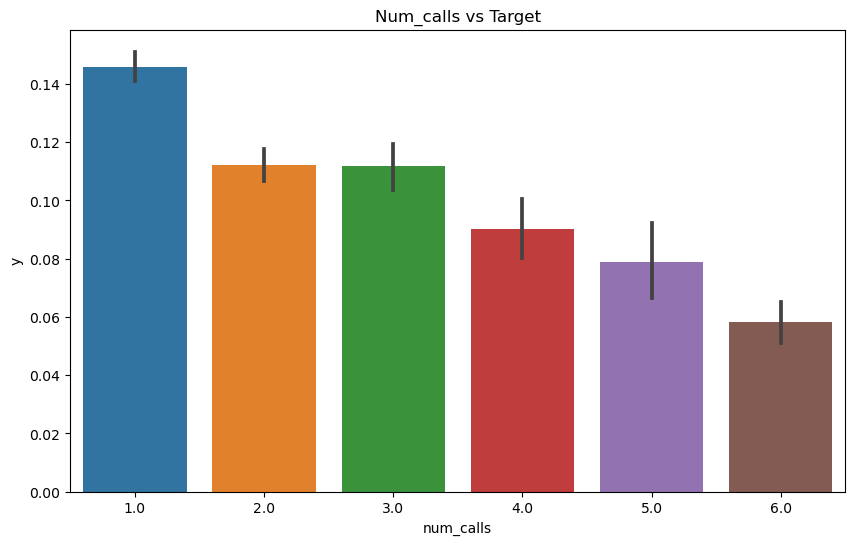

In [59]:
# Plotting the figure using barplot
sort = sorted(data['num_calls'].unique())
plt.figure(figsize=(10,6))
sns.barplot(x='num_calls', y='y', data=data, order=sort)
plt.xticks(rotation=0)
plt.title('Num_calls vs Target')
plt.show()

we can see that no 1 has the highest conversion rate.

# DUR

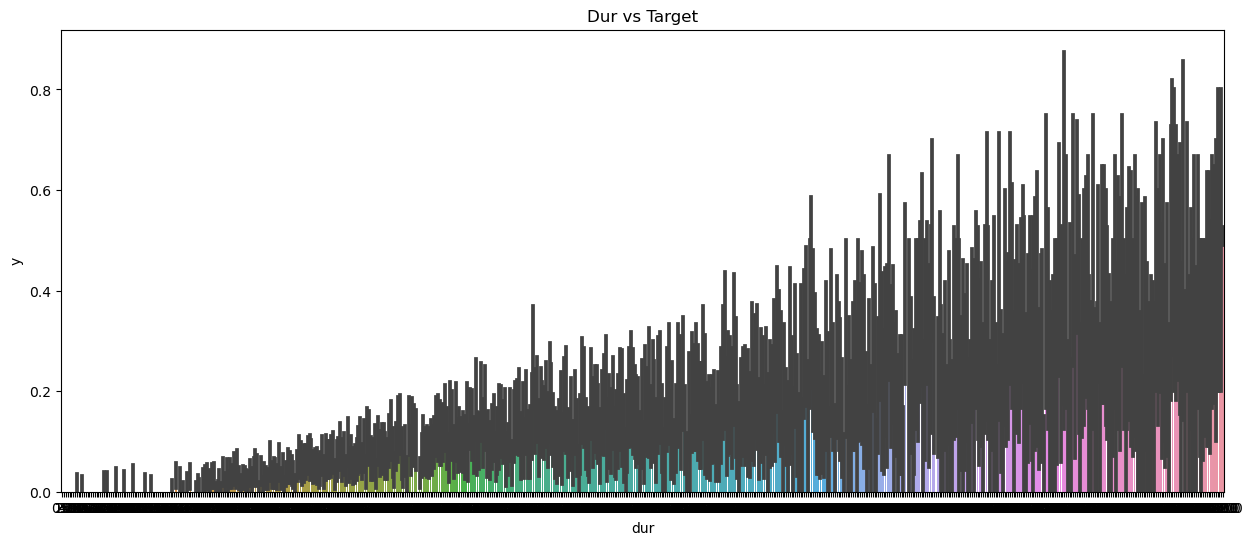

In [60]:
# Plotting the figure using barplot
sort_dur = sorted(data['dur'].unique())
plt.figure(figsize=(15,6))
sns.barplot(x='dur', y='y', data=data, order=sort_dur)
plt.xticks(rotation=0)
plt.title('Dur vs Target')
plt.show()

# Features Vs Target plots together (for our reference)

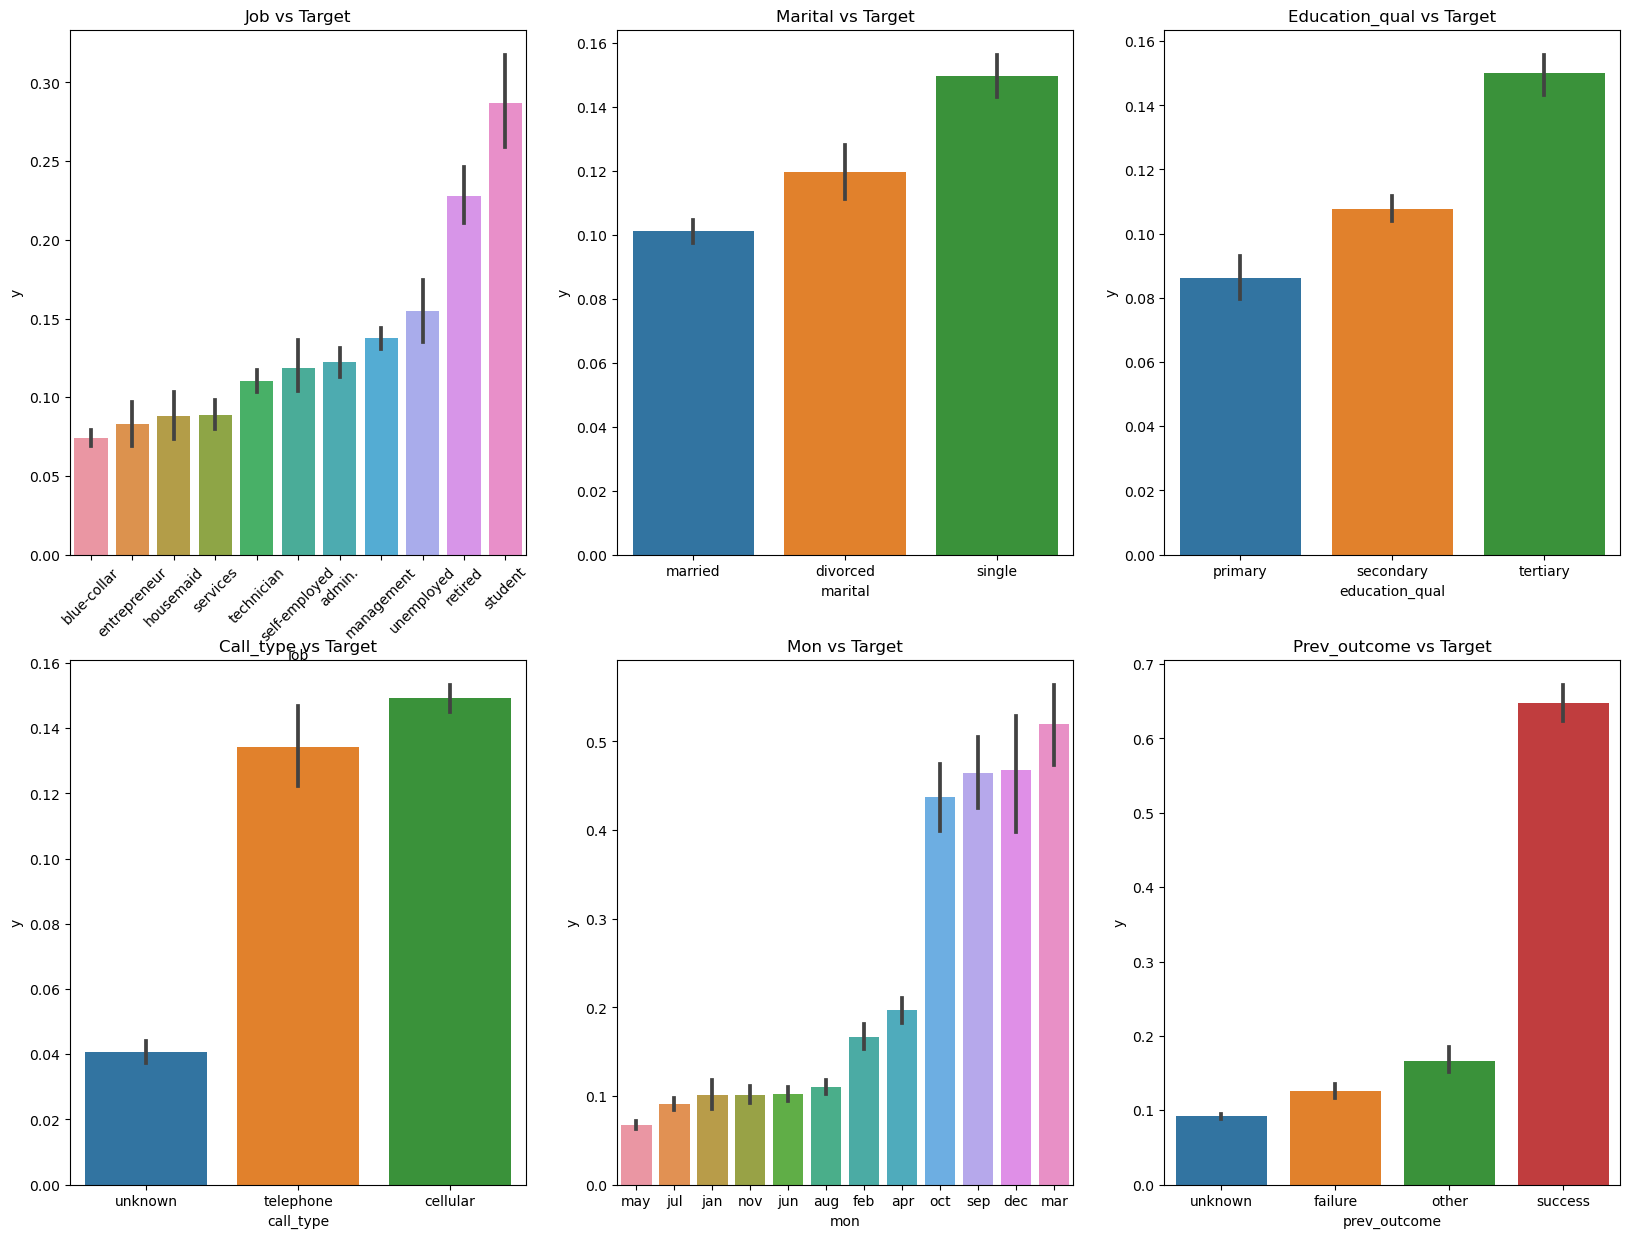

<Figure size 640x480 with 0 Axes>

In [61]:
# Plotting the figure using barplot
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=45)
plt.title('Job vs Target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=0)
plt.title('Marital vs Target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=0)
plt.title('Education_qual vs Target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=0)
plt.title('Call_type vs Target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=0)
plt.title('Mon vs Target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=0)
plt.title('Prev_outcome vs Target')

plt.show()
plt.tight_layout()

# Finding Conversion rate for Age & Duration

# Age

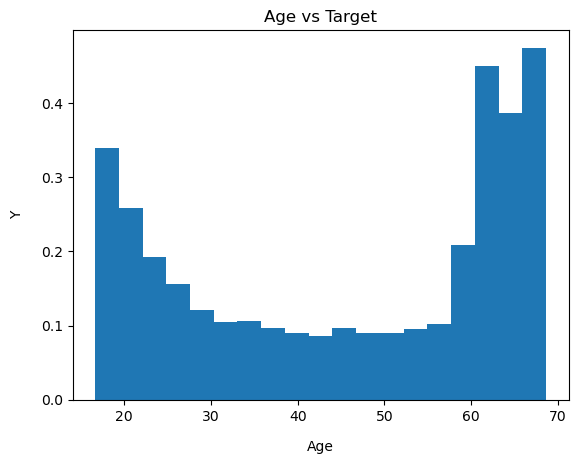

In [62]:
bins = np.linspace(data.age.min(), data.age.max(), 20)
c = np.digitize(data.age, bins)

plt.bar(
    bins[:-1], 
    [np.mean(data.y.values[c == i]) for i in range(1, len(bins))],
    width=bins[1] - bins[0],
)

plt.title('Age vs Target')  # Adding the title
plt.xlabel('Age', labelpad=12)
plt.ylabel('Y', labelpad=12)
plt.show()

# Dur

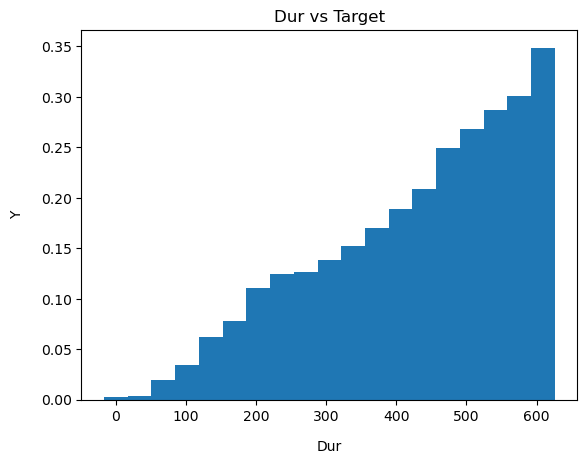

In [63]:
bins = np.linspace(data.dur.min(), data.dur.max(), 20)
c = np.digitize(data.dur, bins)

plt.bar(
    bins[:-1], 
    [np.mean(data.y.values[c == i]) for i in range(1, len(bins))],
    width=bins[1] - bins[0],
)

plt.title('Dur vs Target')  # Adding the title
plt.xlabel('Dur', labelpad=12)
plt.ylabel('Y', labelpad=12)
plt.show()

# Encoding The data

In [54]:
# Assuring the data types before encoding
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [ ]:
# Saving the cleaned data to csv
#data.to_csv("D:/277/Sowbhagya/DS/Streamlit_data.csv")

# Label Encoding

In [56]:
data['job'] = data['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})
data['education_qual'] = data['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})
data['marital'] = data['marital'].map({'married':0, 'divorced':1, 'single':2})

data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,unknown,5,may,261,1,unknown,0
1,44,4,2,1,unknown,5,may,151,1,unknown,0
2,33,1,0,1,unknown,5,may,76,1,unknown,0
3,47,0,0,1,unknown,5,may,92,1,unknown,0
4,33,0,2,1,unknown,5,may,198,1,unknown,0


# One Hot Encoding

In [57]:
data= pd.get_dummies(data, columns=['call_type','mon','prev_outcome'])

data.head()

,age,job,marital,education_qual,day,dur,num_calls,y,call_type_cellular,call_type_telephone,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,7,0,2,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,4,2,1,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,1,0,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,0,1,5,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,2,1,5,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Encoding the data has been done!

# Target and Feature 

In [58]:
X = data[['age','job','marital','education_qual','day','dur','num_calls','call_type_cellular','call_type_telephone','call_type_unknown','mon_apr', 
          'mon_aug','mon_dec','mon_feb','mon_jan','mon_jul','mon_jun','mon_mar','mon_may','mon_nov','mon_oct','mon_sep','prev_outcome_failure','prev_outcome_other','prev_outcome_success','prev_outcome_unknown']].values

y = data['y'].values

# splitting the Data

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36164, 26), (9041, 26), (36164,), (9041,))

# Balancing the data using (SMOTEENN)

In [61]:
# Balancing the data using SMOTEENN
smt = SMOTEENN(sampling_strategy='all') 
X_train, y_train = smt.fit_resample(X_train, y_train)

In [62]:
# Checking whether it is balanced or not
print(len(X_train))
print(len(y_train))

51325
51325


# SCALING the data

In [63]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

# (a) Logistic Regression

In [64]:
# Creating an instance to LR
Lr = LogisticRegression()

# fitting the model to training dataset
Lr.fit(X_train,y_train)

# To find the Training accuracy
Lr.score(X_train,y_train)

# To make predictions on the test dataset
y_pred = Lr.predict(X_test)

print("Training Accuracy :",Lr.score(X_train,y_train))
print("Testing Accuracy :",Lr.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9174476376035071
Testing Accuracy : 0.7985842274084726
F1 Score : 0.4894869638351556
ROC AUC Score : 0.8044271292528129


In [65]:
# Training Accuracy 
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr.score(X_train,y_train)

lr_Train = Lr.score(X_train,y_train)
print(lr_Train)

0.9174476376035071


In [66]:
# Testing accuracy 
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr.score(X_test,y_test)

lr_Test = Lr.score(X_test,y_test)
print(lr_Test)

0.7985842274084726


In [67]:
# ROC AUC score 
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)

lr_auroc = roc_auc_score(y_test, y_pred)

print(lr_auroc)

0.8044271292528129


In [68]:
# F1_Score 
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)

lr_f1 = f1_score(y_test, y_pred)
lr_f1

0.4894869638351556

# (b) Decision Tree

In [69]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
    dt = DecisionTreeClassifier(max_depth=depth) #this will stop the tree when it reaches the max depth
    
    # fitting the model to training dataset
    dt.fit(X_train, y_train)
    # To find the Training accuracy
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
    
    #By setting the maximum depth for DTC
    dt = DecisionTreeClassifier(max_depth=depth)
    
    #It evaluvate the classifier using K-Fold cross validation
    #No of folds is 10
    #the performance metric used for the model is F1 Score so 'Scoring' = 'f1'
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring='f1')
    
    #setting the max depth for another DTC
    dt = DecisionTreeClassifier(max_depth=depth)
    #Training the model
    dt.fit(X_train,y_train)
    
    #predicting the test dataset
    y_pred = dt.predict(X_test)
    
    #Used to evaluvate the binary classification models
    roc = roc_auc_score(y_test,y_pred)
    
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7961617145640526  Cross val score :  0.8263492501640484
Depth  :  2  Training Accuracy :  0.8324403312226011  Cross val score :  0.8631502897749901
Depth  :  3  Training Accuracy :  0.8818899171943497  Cross val score :  0.9031120042122263
Depth  :  4  Training Accuracy :  0.893307355090112  Cross val score :  0.9111484964032155
Depth  :  5  Training Accuracy :  0.907549926936191  Cross val score :  0.9196463595735807
Depth  :  6  Training Accuracy :  0.9214612761811982  Cross val score :  0.92897323925157
Depth  :  7  Training Accuracy :  0.9337944471505114  Cross val score :  0.9388174085420058
Depth  :  8  Training Accuracy :  0.9453872381880175  Cross val score :  0.9469684853750344
Depth  :  9  Training Accuracy :  0.951680467608378  Cross val score :  0.9480423339651735
Depth  :  10  Training Accuracy :  0.9622211397954213  Cross val score :  0.9538130891221724
Depth  :  20  Training Accuracy :  0.9992985874330248  Cross val score :  0.95991774

In [70]:
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)
print("Training Accuracy :",t.score(X_train,y_train))
print("Testing Accuracy :",t.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.8556575600044243
F1 Score : 0.5435466946484785
ROC AUC Score : 0.7981892228015578


In [71]:
# Training Accuracy for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
t.score(X_train,y_train)

dt_train = t.score(X_train,y_train)
print(dt_train)

1.0


In [72]:
# Testing Accuracy for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
t.score(X_train,y_train)

dt_test = t.score(X_test,y_test)
print(dt_test)

0.8577590974449729


In [73]:
# F1_Score for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)

dt_f1 = f1_score(y_test,y_pred)
print(dt_f1)

0.5439831104855736


In [74]:
# ROC AUC score for Decision Tree Classifier
t = DecisionTreeClassifier(max_depth=40)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)

dt_auroc = roc_auc_score(y_test, y_pred)
print(dt_auroc)

0.7977981421039417


# Feature Importance

In [75]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [76]:
X_test = pd.DataFrame(X_test, columns = ['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'])

# Creating instance of decision tree classifier with maximum depth
dtc = DecisionTreeClassifier(max_depth=40)

# Fitting the model with training data for prediction
dtc.fit(X_train, y_train)

# this retrieves the feature importance from the model
importance = dtc.feature_importances_

# this combines the feature names and its importance in a list of tuples
feature_importances = list(zip(X_test.columns, importance))

# This sorts the values in descending order (gets the second element of each tuple)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Finding the maximum length of feature names for consistent spacing
max_length = max(len(feature) for feature, _ in feature_importances)

# Printing the sorted feature importances with consistent spacing
for feature, importance in feature_importances:
    spacing = ' ' * (max_length - len(feature) + 1)
    print(feature + ':' + spacing, importance)

dur:                   0.4591105531831818
prev_outcome_unknown:  0.11096668479907104
prev_outcome_failure:  0.06875609048643107
call_type_unknown:     0.06666179517264736
age:                   0.04507715763303553
day:                   0.044378517704308014
prev_outcome_other:    0.03690906065330508
mon_may:               0.026502516039759724
mon_jul:               0.022206190469256225
mon_nov:               0.01922372170776342
mon_aug:               0.016941496777375553
job:                   0.01560330574609093
mon_feb:               0.012758915501598609
mon_apr:               0.012162793502500328
num_calls:             0.011395892118185631
mon_jan:               0.010369088017806758
marital:               0.0045047418760173485
education_qual:        0.003674302355933371
prev_outcome_success:  0.002967231127017563
mon_oct:               0.002293750240970307
mon_jun:               0.0018089968708496036
mon_sep:               0.001470442400064656
mon_mar:               0.00133494160388

The Feature importance is 

1) Duration of the call

2) Previous outcome unknown

3) Call type unknown

# (c) K-Nearest Neighbour 

In [77]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn= KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print("K value  : " , i, " Train score : ", knn.score(X_train,y_train) , " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')))

K value  :  1  Train score :  1.0  Cross val score :  0.9950254182407644
K value  :  2  Train score :  0.9997467121285923  Cross val score :  0.9951831155877306
K value  :  3  Train score :  0.9961032635168047  Cross val score :  0.9865612369027513
K value  :  4  Train score :  0.9961032635168047  Cross val score :  0.9870878722830495
K value  :  5  Train score :  0.988368241597662  Cross val score :  0.9754808130967243
K value  :  6  Train score :  0.9890501704822211  Cross val score :  0.9773971588670418
K value  :  7  Train score :  0.9784510472479299  Cross val score :  0.9675577128020109
K value  :  8  Train score :  0.9802435460301997  Cross val score :  0.9694149709408377
K value  :  9  Train score :  0.9697028738431563  Cross val score :  0.9605591150957931
K value  :  10  Train score :  0.971709693132002  Cross val score :  0.9625433714291376
K value  :  20  Train score :  0.9379249878226985  Cross val score :  0.9375069864231295
K value  :  30  Train score :  0.91920116902094

In [78]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :",knn.score(X_train,y_train))
print("Testing Accuracy :",knn.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9961032635168047
Testing Accuracy : 0.71961066253733
F1 Score : 0.37730287398673545
ROC AUC Score : 0.7173649638872183


In [79]:
# Training Accuracy for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

knn_train = knn.score(X_train,y_train)
print(knn_train)

0.9961032635168047


In [80]:
# Testing Accuracy for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

knn_test = knn.score(X_test,y_test)
print(knn_test)

0.71961066253733


In [81]:
# F1_Score for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn_f1 = f1_score(y_test,y_pred)
print(knn_f1)

0.37730287398673545


In [82]:
# ROC AUC score for KNN classifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn_auroc = roc_auc_score(y_test, y_pred)
print(knn_auroc)

0.7173649638872183


# (d) XG-Boost

In [83]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0)
    model.fit(X_train,y_train)
    model.score(X_test, y_test)
    
    print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='f1')))

Learning rate :  0.01  Train score :  0.9411008280565026  Cross-Val score :  0.9439165455058592
Learning rate :  0.02  Train score :  0.9505698977106674  Cross-Val score :  0.9529156202902584
Learning rate :  0.03  Train score :  0.9574086702386752  Cross-Val score :  0.9578287659560338
Learning rate :  0.04  Train score :  0.9660399415489528  Cross-Val score :  0.9639452879382187
Learning rate :  0.05  Train score :  0.9695859717486605  Cross-Val score :  0.9663539262836693
Learning rate :  0.06  Train score :  0.9719824646858256  Cross-Val score :  0.9677943824542995
Learning rate :  0.07  Train score :  0.9735606429615197  Cross-Val score :  0.9685918085505556
Learning rate :  0.08  Train score :  0.975021919142718  Cross-Val score :  0.9687995274574839
Learning rate :  0.09  Train score :  0.975762299074525  Cross-Val score :  0.9693299717491147
Learning rate :  0.1  Train score :  0.9765611300535801  Cross-Val score :  0.9690526011009766
Learning rate :  0.11  Train score :  0.977

In [88]:
xg = XGBClassifier(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy :",xg.score(X_train,y_train))
print("Testing Accuracy :",xg.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.997506088650755
Testing Accuracy : 0.8691516425174206
F1 Score : 0.5800496982605609
ROC AUC Score : 0.821940748179764


In [89]:
# Training Accuracy for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)

xg_train = xg.score(X_train,y_train)
print(xg_train)

0.9938236726741354


In [90]:
# Testing Accuracy for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)

xg_test = xg.score(X_test,y_test)
print(xg_test)

0.8725804667625263


In [91]:
# F1_Score for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

xg_f1 = f1_score(y_test,y_pred)
print(xg_f1)

0.5885714285714286


In [92]:
# ROC AUC Score for XG-Boost classifier
xg = XGBClassifier(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

xg_auroc = roc_auc_score(y_test, y_pred)
print(xg_auroc)

0.8267029643426421


# Feature Importance for XG-Boost

In [93]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [94]:
X_test = pd.DataFrame(X_test, columns = ['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'])

# Creating instance of decision tree classifier with maximum depth
xgboost_model = xgb.XGBClassifier(learning_rate = 0.5)

# Fitting the model with training data for prediction
xgboost_model.fit(X_train, y_train)

# this retrieves the feature importance from the model
importance = xgboost_model.feature_importances_

# this combines the feature names and its importance in a list of tuples
feature_importances = list(zip(X_test.columns, importance))

# This sorts the values in descending order (gets the second element of each tuple)
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Finding the maximum length of feature names for consistent spacing
max_length = max(len(feature) for feature, _ in feature_importances)

# Printing the sorted feature importances with consistent spacing
for feature, importance in feature_importances:
    spacing = ' ' * (max_length - len(feature) + 1)
    print(feature + ':' + spacing, importance)

call_type_unknown:     0.14137423
prev_outcome_unknown:  0.12360942
prev_outcome_failure:  0.12221535
prev_outcome_other:    0.11292556
mon_may:               0.070058145
mon_jul:               0.06673701
mon_nov:               0.06478967
mon_aug:               0.050140053
mon_jan:               0.04268483
dur:                   0.041750684
mon_apr:               0.025702216
mon_feb:               0.024768975
mon_jun:               0.015305259
prev_outcome_success:  0.014406787
call_type_telephone:   0.0112003125
mon_oct:               0.010819491
mon_dec:               0.009465804
mon_sep:               0.008678579
num_calls:             0.00797047
mon_mar:               0.007247845
job:                   0.0063394476
call_type_cellular:    0.0057070483
day:                   0.00562607
age:                   0.005066968
marital:               0.0029480914
education_qual:        0.0024616357


The feature importance is:

1) call_type Unknown

2) Prev_outcome_unknown

3) Prev_outcome_failure

# (e) Random Forest

In [95]:
random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
random.fit(X_train, y_train)
y_pred= random.predict(X_test)

In [96]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
    random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
    random.fit(X_train, y_train)
    random = RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
    valAccuracy = cross_val_score(random, X_train, y_train, cv=10, scoring='f1')
    
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  1.0  Cross val score :  0.8920396559575838
Depth  :  2  Training Accuracy :  1.0  Cross val score :  0.8935397156339558
Depth  :  3  Training Accuracy :  1.0  Cross val score :  0.8888429564594258
Depth  :  4  Training Accuracy :  1.0  Cross val score :  0.8925105540275086
Depth  :  5  Training Accuracy :  1.0  Cross val score :  0.8961118480771321
Depth  :  6  Training Accuracy :  1.0  Cross val score :  0.8904643620899977
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.8871937599634929
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.8863092035868881
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.892749798431575
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.8859489386480973


In [97]:
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)
print("Training Accuracy :",random.score(X_train,y_train))
print("Testing Accuracy :",random.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))


Training Accuracy : 0.9635460301997077
Testing Accuracy : 0.8348634000663644
F1 Score : 0.5523238380809595
ROC AUC Score : 0.8443274030910438


In [98]:
# Training Accuracy for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
random.score(X_train,y_train)

random_train = random.score(X_train,y_train)
print(random_train)

0.9643838285435947


In [99]:
# Testing Accuracy for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
random.score(X_train,y_train)

random_test = random.score(X_test,y_test)
print(random_test)

0.8364119013383475


In [100]:
# F1_Score for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)

random_f1 = f1_score(y_test,predictions)
print(random_f1)

0.5611685940353012


In [101]:
# ROC AUC score for Random Forest classifier
random = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
random.fit(X_train, y_train)
predictions = random.predict(X_test)

random_auroc = roc_auc_score(y_test,predictions)
print(random_auroc)

0.8445929502712108


In [102]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'dur', 'num_calls',
       'y', 'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

# CONCLUSION

In [103]:
# Creating a dataframe to analyse the best value of F1_Score
models = {'Model_Classifier':['Logistic Regression','Decision Tree','K-Nearest Neighbour','XG-Boost','Random Forest'],
          'Train_Accuracy':[lr_Train,dt_train,knn_train,xg_train,random_train],
          'Test_Accuracy': [lr_Test,dt_test,knn_test,xg_test,random_test],
          'roc_auc_score': [lr_auroc,dt_auroc,knn_auroc,xg_auroc,random_auroc],
          'F1_Score':      [lr_f1,dt_f1,knn_f1,xg_f1,random_f1]}

In [104]:
# Assuming `models` is a list of models
mdf = pd.DataFrame(models)

# Applying alignment using the `style` attribute
mdf_styled = mdf.style.set_properties(**{'text-align': 'center', 'white-space': 'pre'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Displaying the styled dataframe
display(mdf_styled)

,Model_Classifier,Train_Accuracy,Test_Accuracy,roc_auc_score,F1_Score
0,Logistic Regression,0.917448,0.798584,0.804427,0.489487
1,Decision Tree,1.000000,0.857759,0.797798,0.543983
2,K-Nearest Neighbour,0.996103,0.719611,0.717365,0.377303
3,XG-Boost,0.993824,0.872580,0.826703,0.588571
4,Random Forest,0.964384,0.836412,0.844593,0.561169


After building the Model, the important features for Customer Conversion Predictions for an insurance company are :

prev_outcome_unknown : the customers failed to share the details of unknown plays ideal role to subscribe for an insurance.

prev_outcome_failure : The prev_outcome failed and that is a important role to subscribe for an insurance.

Duration of call : The amount of time spent with the customer during the call, may have major impact in the conversion.

Hence, XG-Boost classifier gives the highest value for F1_Score